In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [44]:
data = pd.read_excel('AirQualityUCI.xlsx')

In [45]:
data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.000000,150,11.881723,1045.500000,166.0,1056.250000,113.0,1692.000000,1267.500000,13.600000,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.250000,112,9.397165,954.750000,103.0,1173.750000,92.0,1558.750000,972.250000,13.300000,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.000000,88,8.997817,939.250000,131.0,1140.000000,114.0,1554.500000,1074.000000,11.900000,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.500000,80,9.228796,948.250000,172.0,1092.000000,122.0,1583.750000,1203.250000,11.000000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.250000,51,6.518224,835.500000,131.0,1205.000000,116.0,1490.000000,1110.000000,11.150000,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.000000,38,4.741012,750.250000,89.0,1336.500000,96.0,1393.000000,949.250000,11.175000,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.000000,31,3.624399,689.500000,62.0,1461.750000,77.0,1332.750000,732.500000,11.325000,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.250000,31,3.326677,672.000000,62.0,1453.250000,76.0,1332.750000,729.500000,10.675000,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.000000,24,2.339416,608.500000,45.0,1579.000000,60.0,1276.000000,619.500000,10.650000,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.750000,19,1.696658,560.750000,-200.0,1705.000000,-200.0,1234.750000,501.250000,10.250000,60.200001,0.751657


1.	Please do a simple EDA for the dataset. 

In [46]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


0 Date (DD/MM/YYYY)

1 Time (HH.MM.SS)

2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)

3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

7 True hourly averaged NOx concentration in ppb (reference analyzer)

8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)

11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)

12 Temperature in Â°C

13 Relative Humidity (%)

14 AH Absolute Humidity

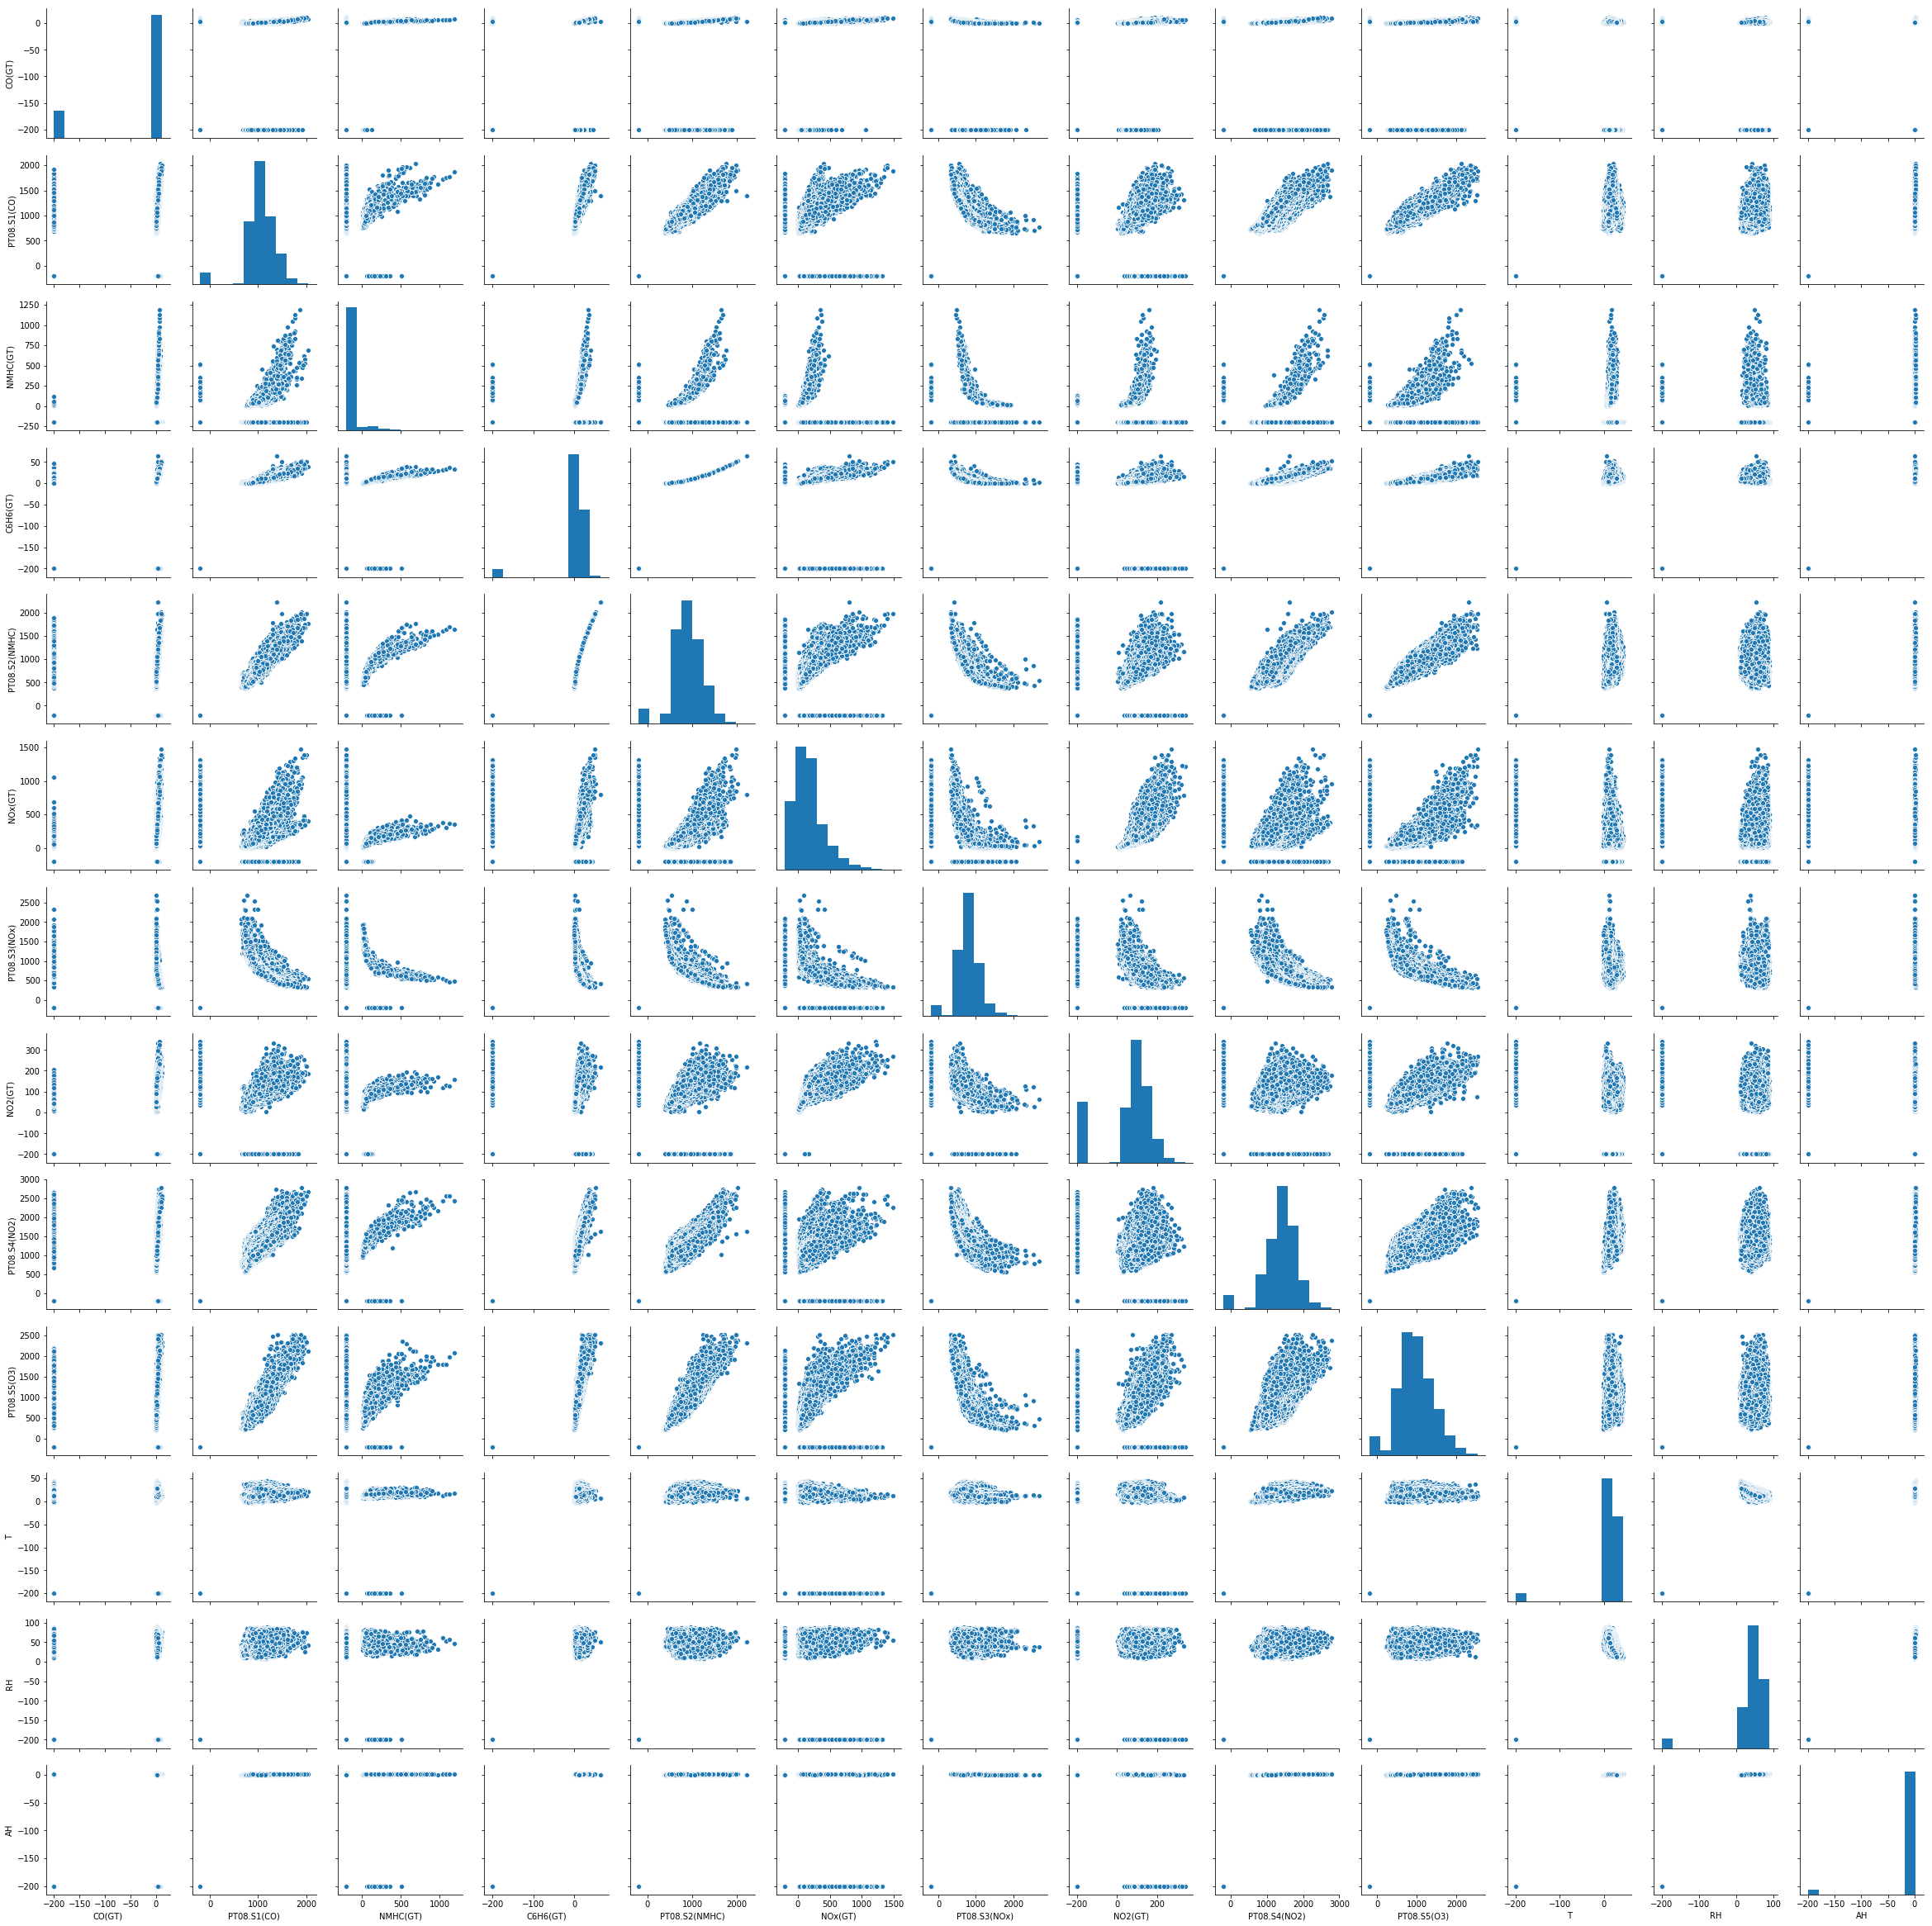

In [47]:
sns.pairplot(data)

1.Most of the data points of the hourly averaged concentration CO in mg/m^3 distribute in two poles, -200 and 1.

2.True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 seems that have a linear relationship with True hourly averaged concentration CO in mg/m^3.

3.PT08.S3 (tungsten oxide) hourly averaged sensor response seems that have a quodratic relationship with True hourly averaged concentration CO in mg/m^3.

4.PT08.S4 (tungsten oxide) hourly averaged sensor response looks that have a linear relationship with True hourly averaged concentration CO in mg/m^3.

5.PT08.S5 (indium oxide) hourly averaged sensor response seems that have a linear relationship with True hourly averaged concentration CO in mg/m^3.

6.True hourly averaged NO2 concentration in microg/m^3 seems that have a quadratic relationship with PT08.S2 (titania) hourly averaged sensor response.

7.PT08.S4 (tungsten oxide) hourly averaged sensor response seems that have a linear relationship with PT08.S2 (titania) hourly averaged sensor response.

8.PT08.S5 (indium oxide) hourly averaged sensor response looks that have a linear relationship with PT08.S2 (titania) hourly averaged sensor response.

9.PT08.S3 (tungsten oxide) hourly averaged sensor response seems that have a quadratic relationship with PT08.S4 (tungsten oxide) hourly averaged sensor response.

10.PT08.S3 (tungsten oxide) hourly averaged sensor response looks that have a quadratic relationship with PT08.S5 (indium oxide) hourly averaged sensor response.

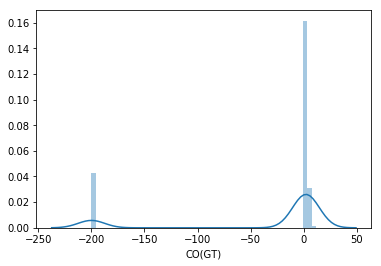

In [48]:
sns.distplot(data['CO(GT)'])

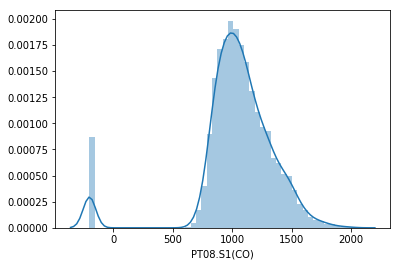

In [49]:
sns.distplot(data['PT08.S1(CO)'])

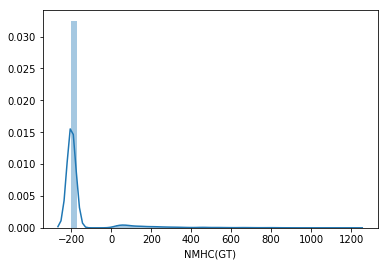

In [50]:
sns.distplot(data['NMHC(GT)'])

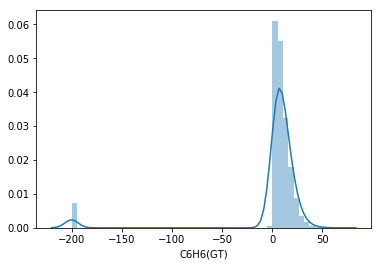

In [51]:
sns.distplot(data['C6H6(GT)'])

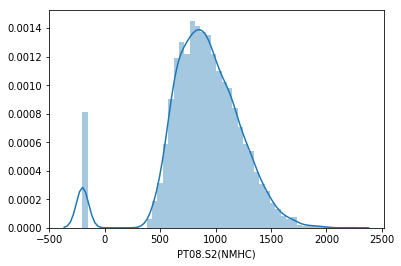

In [52]:
sns.distplot(data['PT08.S2(NMHC)'])

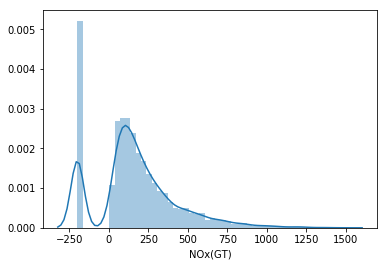

In [53]:
sns.distplot(data['NOx(GT)'])

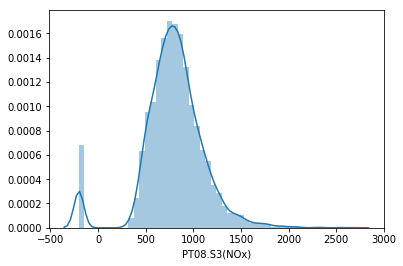

In [54]:
sns.distplot(data['PT08.S3(NOx)'])

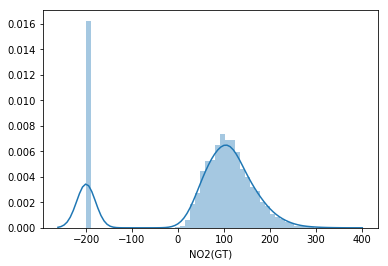

In [55]:
sns.distplot(data['NO2(GT)'])

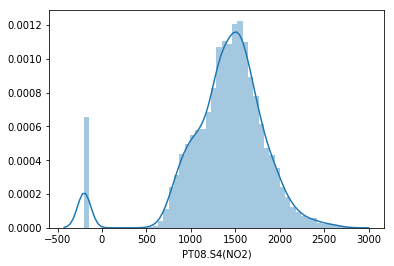

In [56]:
sns.distplot(data['PT08.S4(NO2)'])

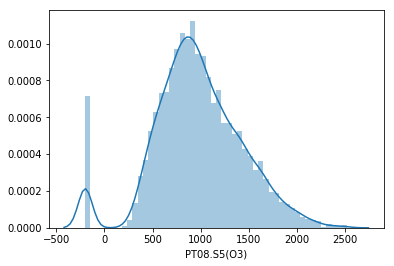

In [57]:
sns.distplot(data['PT08.S5(O3)'])

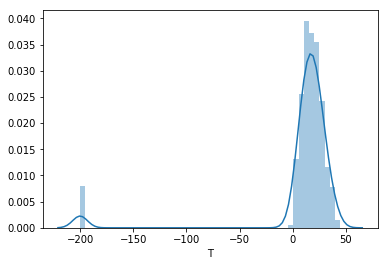

In [58]:
sns.distplot(data['T'])

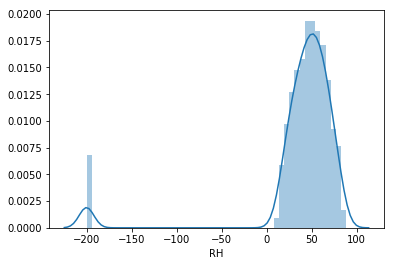

In [59]:
sns.distplot(data['RH'])

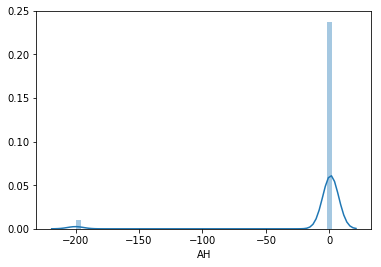

In [60]:
sns.distplot(data['AH'])

2.	Do the principal components analysis with 2 components. 

In [61]:
feature_name = data.keys().tolist()

Drop the column of 'Date' and 'Time'

In [62]:
feature_name.pop(0)

'Date'

In [63]:
feature_name.pop(0)

'Time'

In [64]:
data_variable =pd.DataFrame(data, columns = feature_name )

In [65]:
data_variable

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.000000,150,11.881723,1045.500000,166.0,1056.250000,113.0,1692.000000,1267.500000,13.600000,48.875001,0.757754
1,2.0,1292.250000,112,9.397165,954.750000,103.0,1173.750000,92.0,1558.750000,972.250000,13.300000,47.700000,0.725487
2,2.2,1402.000000,88,8.997817,939.250000,131.0,1140.000000,114.0,1554.500000,1074.000000,11.900000,53.975000,0.750239
3,2.2,1375.500000,80,9.228796,948.250000,172.0,1092.000000,122.0,1583.750000,1203.250000,11.000000,60.000000,0.786713
4,1.6,1272.250000,51,6.518224,835.500000,131.0,1205.000000,116.0,1490.000000,1110.000000,11.150000,59.575001,0.788794
5,1.2,1197.000000,38,4.741012,750.250000,89.0,1336.500000,96.0,1393.000000,949.250000,11.175000,59.175000,0.784772
6,1.2,1185.000000,31,3.624399,689.500000,62.0,1461.750000,77.0,1332.750000,732.500000,11.325000,56.775000,0.760312
7,1.0,1136.250000,31,3.326677,672.000000,62.0,1453.250000,76.0,1332.750000,729.500000,10.675000,60.000000,0.770238
8,0.9,1094.000000,24,2.339416,608.500000,45.0,1579.000000,60.0,1276.000000,619.500000,10.650000,59.674999,0.764819
9,0.6,1009.750000,19,1.696658,560.750000,-200.0,1705.000000,-200.0,1234.750000,501.250000,10.250000,60.200001,0.751657


Standardize the data_variable

In [66]:
std_data_variable = StandardScaler().fit_transform(data_variable)

Execute the PCA to reduce the dimension of the data of air quality

In [67]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(std_data_variable)
principal_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

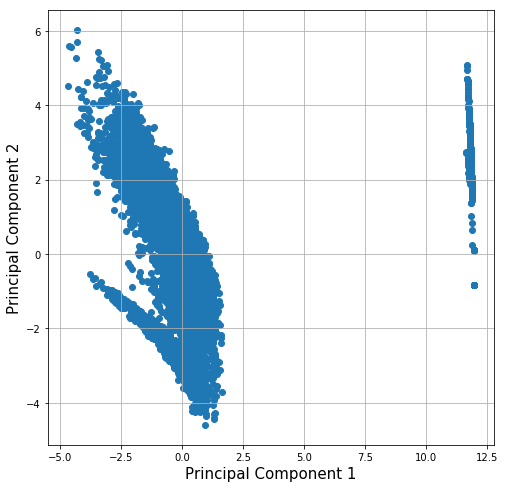

In [68]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.scatter(principal_df.loc[:,'principal component 1'], principal_df.loc[:,'principal component 2'])
ax.grid()

In [69]:
pca.explained_variance_ratio_

array([0.50651055, 0.2265331 ])

In [70]:
np.cumsum(pca.explained_variance_ratio_)

array([0.50651055, 0.73304365])

According to the above outcome, component 1 and component 2 explain 73.3% of the variance of the whole dataset.

4.	Use scree plot to choose the number of principal components, and illustrate how you choose clearly.

In [71]:
covar_matrix = PCA(n_components = 13)

In [72]:
covar_matrix.fit(std_data_variable)
variance = covar_matrix.explained_variance_ratio_
variance

array([5.06510555e-01, 2.26533098e-01, 1.08374244e-01, 7.94065071e-02,
       3.02875950e-02, 1.92912061e-02, 1.01207970e-02, 8.12917837e-03,
       5.88479857e-03, 3.06243457e-03, 2.17110797e-03, 2.00554469e-04,
       2.79241312e-05])

In [73]:
var = np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var

array([50.7, 73.4, 84.2, 92.1, 95.1, 97. , 98. , 98.8, 99.4, 99.7, 99.9,
       99.9, 99.9])

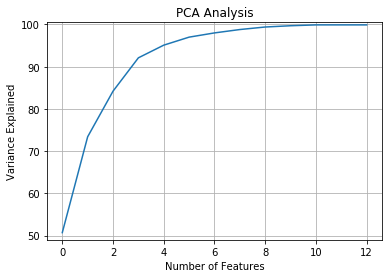

In [74]:
plt.ylabel('Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(49,100.5)
#plt.style.context('seaborn-whitegrid')
plt.grid()
plt.plot(var)

Based on the top plot, I can capture 95% of the variance of the entire dataset. Hence, I take five components to capture part of the variation of the whole data group.

In [75]:
pca = PCA(n_components = 5)
principalComponents = pca.fit_transform(std_data_variable)
principal_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

In [76]:
pca.explained_variance_ratio_

array([0.50651055, 0.2265331 , 0.10837424, 0.07940651, 0.0302876 ])

In [77]:
np.cumsum(pca.explained_variance_ratio_)

array([0.50651055, 0.73304365, 0.8414179 , 0.9208244 , 0.951112  ])

According to the above outcome, the five components explain 95.1% of the variance of the whole dataset.